In [1]:
from sklearn import datasets
import numpy as np
import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # from chapter_2 -> project root
if project_root not in sys.path:
    sys.path.insert(0, project_root)

### Sigmoid

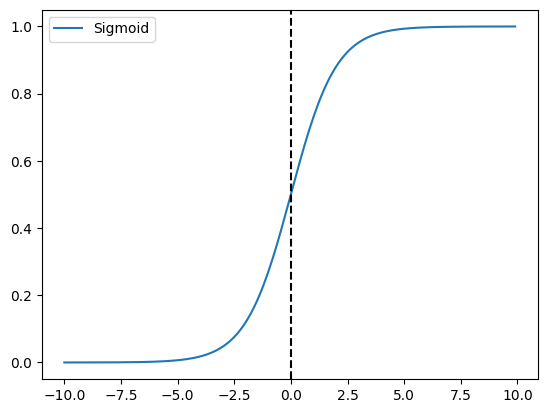

In [2]:
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.arange(-10., 10., 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.axvline(0, color='k', ls='--')
plt.legend(['Sigmoid'])
plt.show()

### Loss functions

(0.0, 1.0)

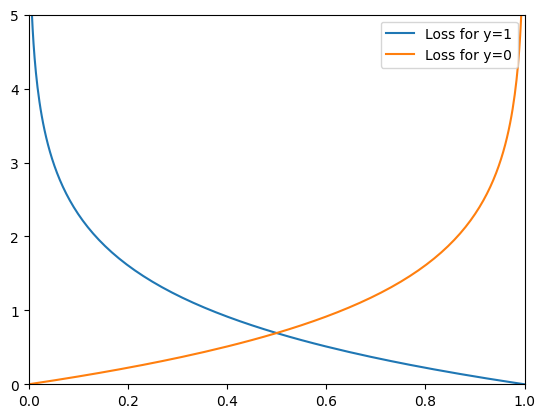

In [3]:
def loss_1(x):
    return -np.log(sigmoid(x))
def loss_0(x):
    return -np.log(1 - sigmoid(x))

x = np.arange(-10., 10., 0.1)
sigmoid_x = sigmoid(x)
y1 = loss_1(x)
y0 = loss_0(x)
plt.plot(sigmoid_x, y1, label='Loss for y=1')
plt.plot(sigmoid_x, y0, label='Loss for y=0')
plt.legend()
plt.ylim(0, 5)
plt.xlim(0, 1)

In [6]:
from chapter_3.logistic_regression import LogisticRegressionSGD
import pandas as pd

iris_dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(iris_dataset_url, header=None)
df = df.iloc[:100]
y = np.where(df.iloc[:, -1].values == "Iris-setosa", 0, 1)
X = df.iloc[:100, [0, 2]].values

In [7]:
standarized_X = np.copy(X)
standarized_X[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
standarized_X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [8]:
logistic_regression = LogisticRegressionSGD(learning_rate=0.1, n_iterations=1000, random_state=42)
logistic_regression.fit(standarized_X, y)

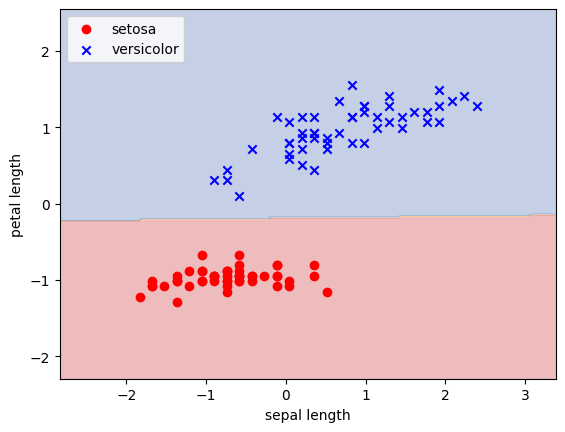

In [9]:
from visualization.visualization import plot_data, plot_decision_regions
    
plot_decision_regions(standarized_X, y, classifier=logistic_regression)
plot_data(standarized_X)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")
plt.show()